# Number Classifer
---


In [136]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras_preprocessing.image import load_img
import visualkeras
from PIL import Image
import tensorflow_datasets

In [137]:
print(tf.__version__)

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2.11.0
Num GPUs Available:  0


In [138]:
def draw(n):
    plt.imshow(n,cmap=plt.cm.binary)
    plt.show()

In [139]:
mnist = tf.keras.datasets.mnist

(x_train,y_train) , (x_test,y_test) = mnist.load_data()
 
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)


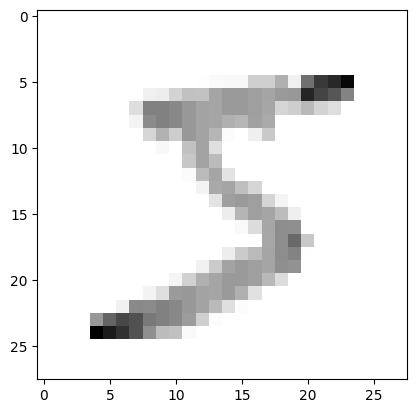

In [140]:
draw(x_train[0])

In [141]:
model = tf.keras.models.Sequential()
 
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
#reshape

model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

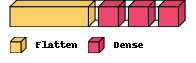

In [142]:
visualkeras.layered_view(model, legend=True)

In [143]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2652 - accuracy: 0.9224
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1088 - accuracy: 0.9667
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0749 - accuracy: 0.9769
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0541 - accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 2s 988us/step - loss: 0.0419 - accuracy: 0.9865
Epoch 6/10
1875/1875 [==============================] - 2s 966us/step - loss: 0.0318 - accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0270 - accuracy: 0.9906
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0210 - accuracy: 0.9931
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0174 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0

In [144]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               100480    
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [145]:
val_loss,val_acc = model.evaluate(x_test,y_test)
print("loss-> ",val_loss,"\nacc-> ",val_acc)

313/313 [==============================] - 0s 561us/step - loss: 0.1093 - accuracy: 0.9749
loss->  0.10928045958280563 
acc->  0.9749000072479248


313/313 [==============================] - 0s 459us/step
label ->  1
prediction ->  1


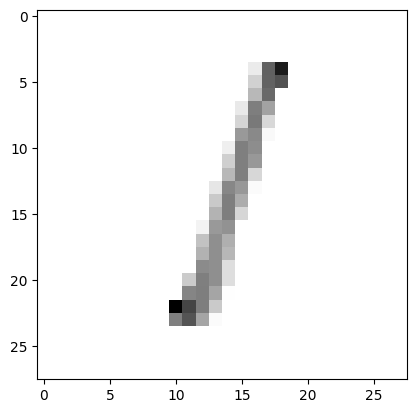

In [146]:
predictions=model.predict([x_test])
print('label -> ',y_test[2])
print('prediction -> ',np.argmax(predictions[2]))
 
draw(x_test[2])

(28, 28)


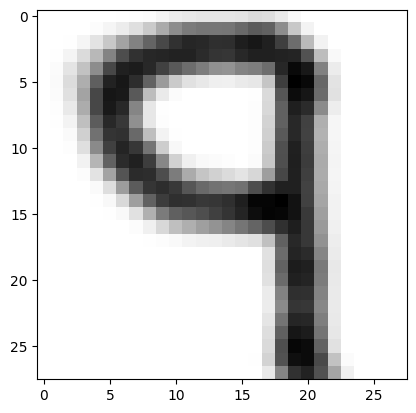

In [152]:
#img = Image.open("6_test.png") #open image from file
#img = load_img("6_test_resized.png") #load image from fil

img = Image.open("9_test.png") #open image from file
img = img.resize((28, 28)) #resize image to 28x28
img = img.convert('L')
img = np.array(img) #load image into numpy array

img = np.invert(img).ravel()

img = img.reshape(28, 28) 
print(img.shape)
plt.imshow(img,cmap=plt.cm.binary) #display numpy array image

In [153]:
img = img.reshape(1, 28, 28)

predictions=model.predict([img])
print('prediction -> ',np.argmax(predictions))

1/1 [==============================] - 0s 12ms/step
prediction ->  6


In [ ]:
model.save('num_classifer.h5')